In [1]:
print("hi")
library(readr)
analysis.anova <- read.csv("C:/Users/radha/Desktop/KaranExcel/Analyst Case Study AutoFinance.csv", sep=",", header = TRUE)
print(head(analysis.anova))
print(str(analysis.anova))

[1] "hi"
  id               city state postalCode country dateOfBirth monthsAtAddress
1  1         NEW ALBANY    IN      47150     USA   8/18/1982              26
2  2              BRONX    NY      10472     USA   6/20/1989               4
3  3 HUNTINGTON STATION    NY      11746     USA    8/9/1976             117
4  4           Franklin    MI      48025     USA   4/16/1979               6
5  5          BALTIMORE    MD      21214     USA    8/8/1956             114
6  6           STAUNTON    IL      62088     USA   5/27/1978              85
  residenceType housingPayment employmentType employedMonths         occupation
1    Own/Buying            100    W2 Employee            129            assbly2
2          Rent           1200    W2 Employee             29            Foreman
3    Own/Buying            600    W2 Employee            178   Staff Accountant
4          Rent           1200    W2 Employee             69           Operator
5          Rent           1300    W2 Employee       

In [2]:
library(eeptools)
#print(analysis.anova$dateOfBirth)
x <- as.Date(analysis.anova$dateOfBirth, , format="%m/%d/%Y")
yourdata.age <- floor(age_calc(x, units = "years"))


newdata <- cbind(analysis.anova,yourdata.age)

ndyears  <- floor(newdata$employedMonths/12)
newdata2 <- cbind(newdata,ndyears)

print(head(newdata2))

Loading required package: ggplot2


  id               city state postalCode country dateOfBirth monthsAtAddress
1  1         NEW ALBANY    IN      47150     USA   8/18/1982              26
2  2              BRONX    NY      10472     USA   6/20/1989               4
3  3 HUNTINGTON STATION    NY      11746     USA    8/9/1976             117
4  4           Franklin    MI      48025     USA   4/16/1979               6
5  5          BALTIMORE    MD      21214     USA    8/8/1956             114
6  6           STAUNTON    IL      62088     USA   5/27/1978              85
  residenceType housingPayment employmentType employedMonths         occupation
1    Own/Buying            100    W2 Employee            129            assbly2
2          Rent           1200    W2 Employee             29            Foreman
3    Own/Buying            600    W2 Employee            178   Staff Accountant
4          Rent           1200    W2 Employee             69           Operator
5          Rent           1300    W2 Employee             42 

In [3]:
print(str(newdata2))

'data.frame':	193336 obs. of  18 variables:
 $ id             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ city           : Factor w/ 12451 levels "ABBEVILLE","ABBOT",..: 7638 1277 5154 3897 536 10698 8905 869 6337 536 ...
 $ state          : Factor w/ 53 levels "AB","AK","AL",..: 17 36 36 24 22 16 11 23 6 22 ...
 $ postalCode     : Factor w/ 21196 levels "10001","10002",..: 10165 80 359 10383 2706 13220 6257 8389 19204 2697 ...
 $ country        : Factor w/ 2 levels "CAN","USA": 2 2 2 2 2 2 2 2 2 2 ...
 $ dateOfBirth    : Factor w/ 19321 levels "1/1/1939","1/1/1941",..: 16594 13518 17701 10045 17632 12249 18262 12509 8366 5854 ...
 $ monthsAtAddress: int  26 4 117 6 114 85 2 12 114 27 ...
 $ residenceType  : Factor w/ 4 levels "Live with Family",..: 3 4 3 4 4 3 2 2 4 4 ...
 $ housingPayment : int  100 1200 600 1200 1300 650 300 1 150 900 ...
 $ employmentType : Factor w/ 3 levels "1099/Self Employed",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ employedMonths : int  129 29 178 69 42 208 226 5 6 131 ...
 $ oc

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich


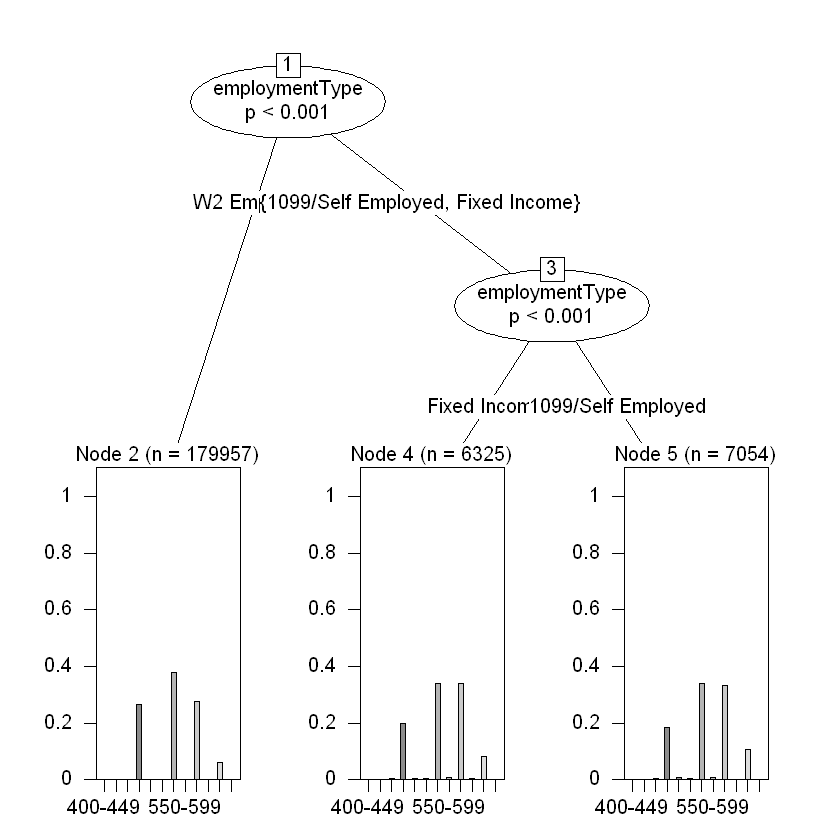

In [4]:
library(party)
empyTypeoutput.tree <- ctree(  creditScore ~ employmentType ,   data = analysis.anova)
plot(empyTypeoutput.tree)

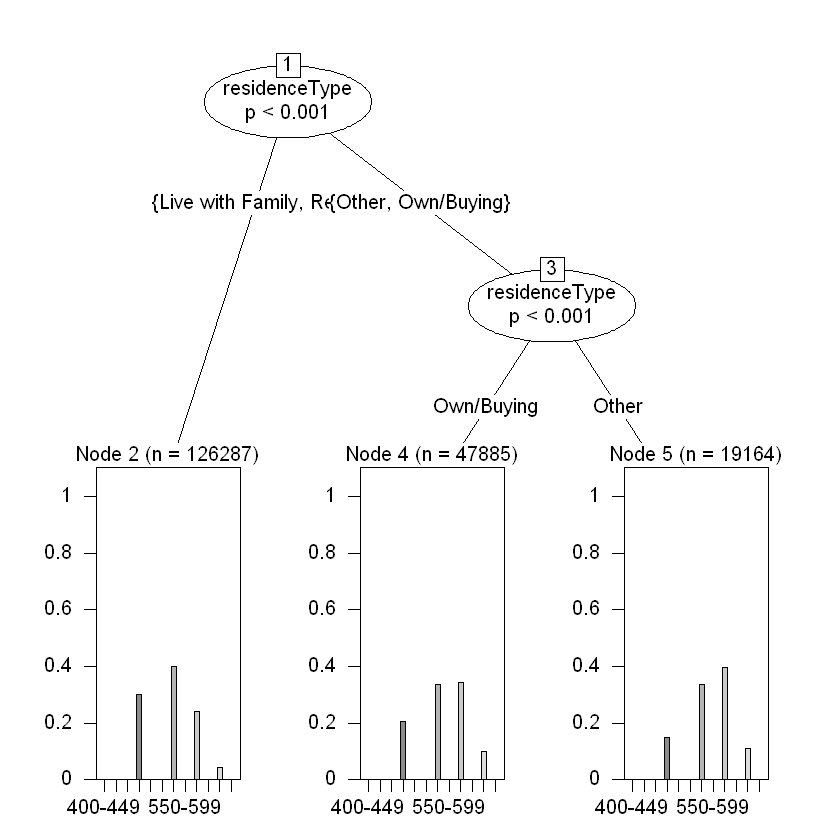

In [5]:
ResTypeoutput.tree <- ctree(  creditScore ~ residenceType ,   data = analysis.anova)
plot(ResTypeoutput.tree)

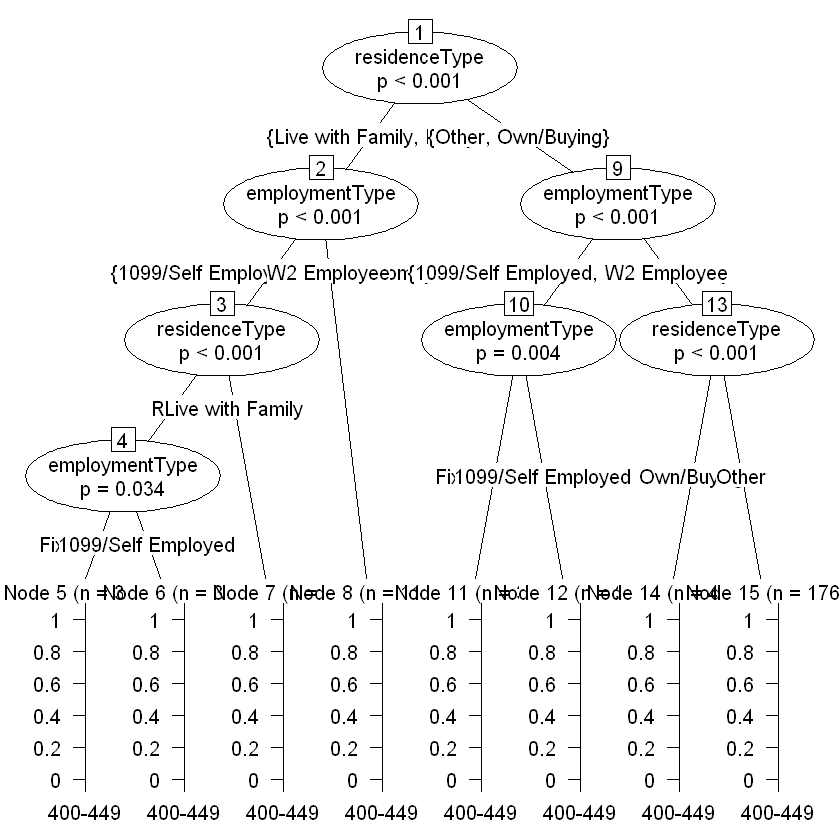

In [8]:
ResTypeoutput.tree <- ctree(  creditScore ~ residenceType+employmentType ,   data = analysis.anova)
plot(ResTypeoutput.tree, width="10", height="10")

In [11]:
credit525 <- subset(newdata2 , (creditScore=="525-574" | creditScore=="475-524"))
head(credit525)
str(credit525)

,id,city,state,postalCode,country,dateOfBirth,monthsAtAddress,residenceType,housingPayment,employmentType,employedMonths,occupation,monthlyIncome,otherIncome,downPayment,creditScore,yourdata.age,ndyears
1,1,NEW ALBANY,IN,47150,USA,8/18/1982,26,Own/Buying,100,W2 Employee,129,assbly2,2000,0,0,525-574,35,10
4,4,Franklin,MI,48025,USA,4/16/1979,6,Rent,1200,W2 Employee,69,Operator,4000,1483,4000,525-574,39,5
5,5,BALTIMORE,MD,21214,USA,8/8/1956,114,Rent,1300,W2 Employee,42,Owner,2200,0,0,525-574,61,3
7,7,POMPANO BEACH,FL,33063,USA,9/19/1958,2,Other,300,W2 Employee,226,School Psychologist,12916,0,1000,525-574,59,18
8,8,BIDDEFORD,ME,4005,USA,5/31/1972,12,Other,1,W2 Employee,5,Consultant,5416,1208,2000,475-524,46,0
9,9,LOS ANGELES,CA,90032,USA,3/15/1985,114,Rent,150,W2 Employee,6,Certified Nurse Assistant,1700,0,0,525-574,33,0


'data.frame':	123816 obs. of  18 variables:
 $ id             : int  1 4 5 7 8 9 10 12 15 17 ...
 $ city           : Factor w/ 12451 levels "ABBEVILLE","ABBOT",..: 7638 3897 536 8905 869 6337 536 3420 9378 3265 ...
 $ state          : Factor w/ 53 levels "AB","AK","AL",..: 17 24 22 11 23 6 22 41 48 17 ...
 $ postalCode     : Factor w/ 21196 levels "10001","10002",..: 10165 10383 2706 6257 8389 19204 2697 1610 3520 10148 ...
 $ country        : Factor w/ 2 levels "CAN","USA": 2 2 2 2 2 2 2 2 2 2 ...
 $ dateOfBirth    : Factor w/ 19321 levels "1/1/1939","1/1/1941",..: 16594 10045 17632 18262 12509 8366 5854 6114 17802 12293 ...
 $ monthsAtAddress: int  26 6 114 2 12 114 27 132 121 128 ...
 $ residenceType  : Factor w/ 4 levels "Live with Family",..: 3 4 4 2 2 4 4 3 4 3 ...
 $ housingPayment : int  100 1200 1300 300 1 150 900 150 600 100 ...
 $ employmentType : Factor w/ 3 levels "1099/Self Employed",..: 3 3 3 3 3 3 3 3 2 2 ...
 $ employedMonths : int  129 69 42 226 5 6 131 186 0 0 ...
 $

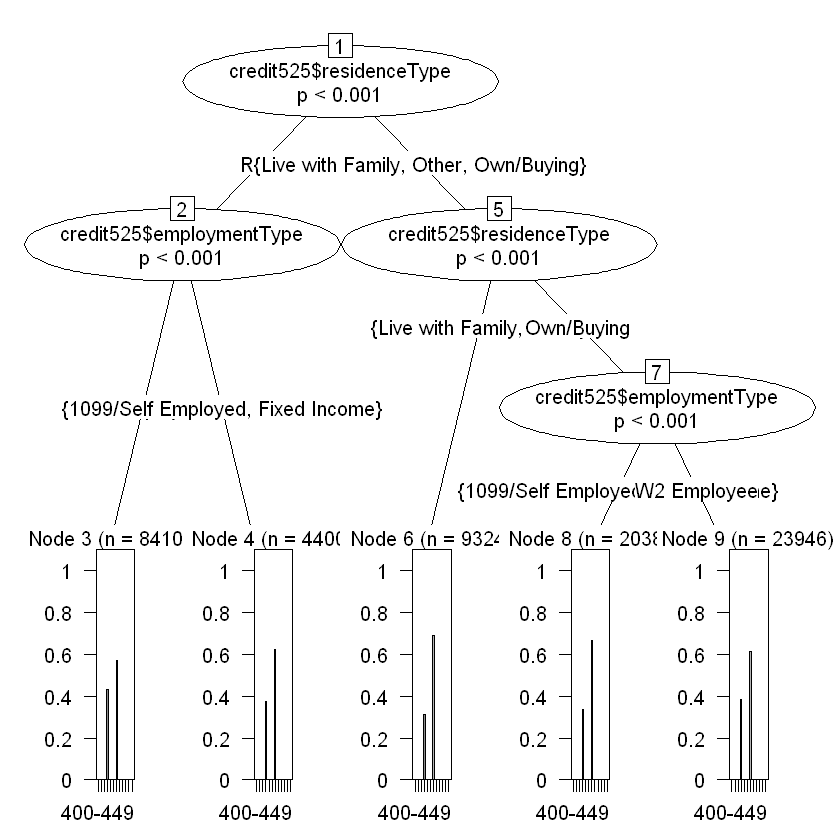

In [18]:
ResTypeoutput.tree <- ctree(  credit525$creditScore ~ credit525$residenceType+credit525$employmentType ,   data = credit525)
plot(ResTypeoutput.tree, width="10", height="10", abbreviate = TRUE)

Loading required package: rpart


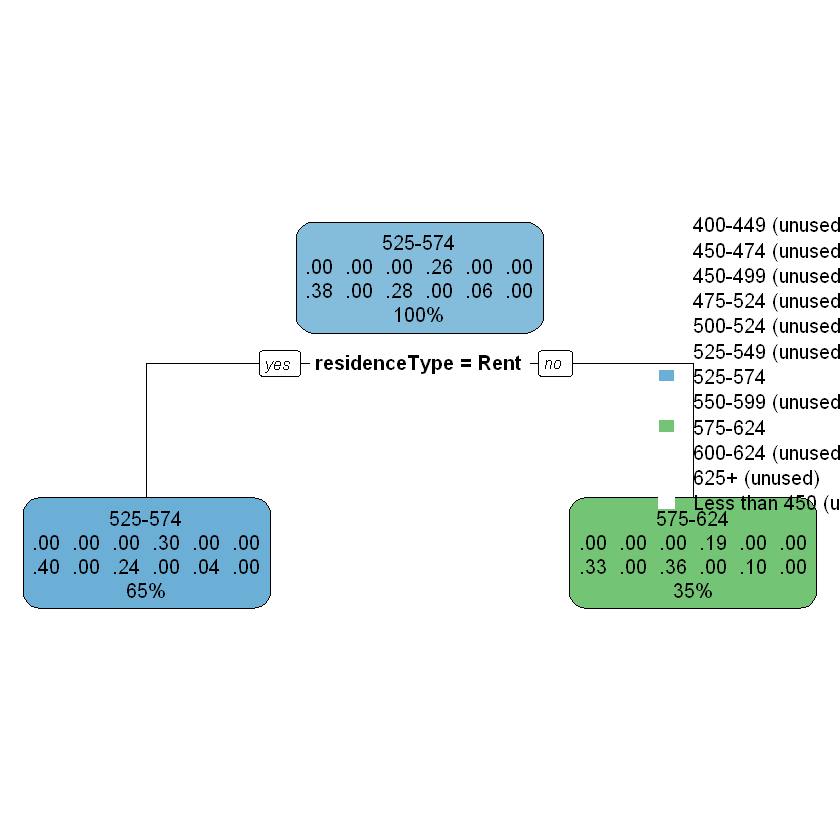

In [8]:
library(rpart.plot)
ResTypeoutput.treerpart <- rpart(  creditScore ~ residenceType ,   data = newdata2)
rpart.plot(ResTypeoutput.treerpart)


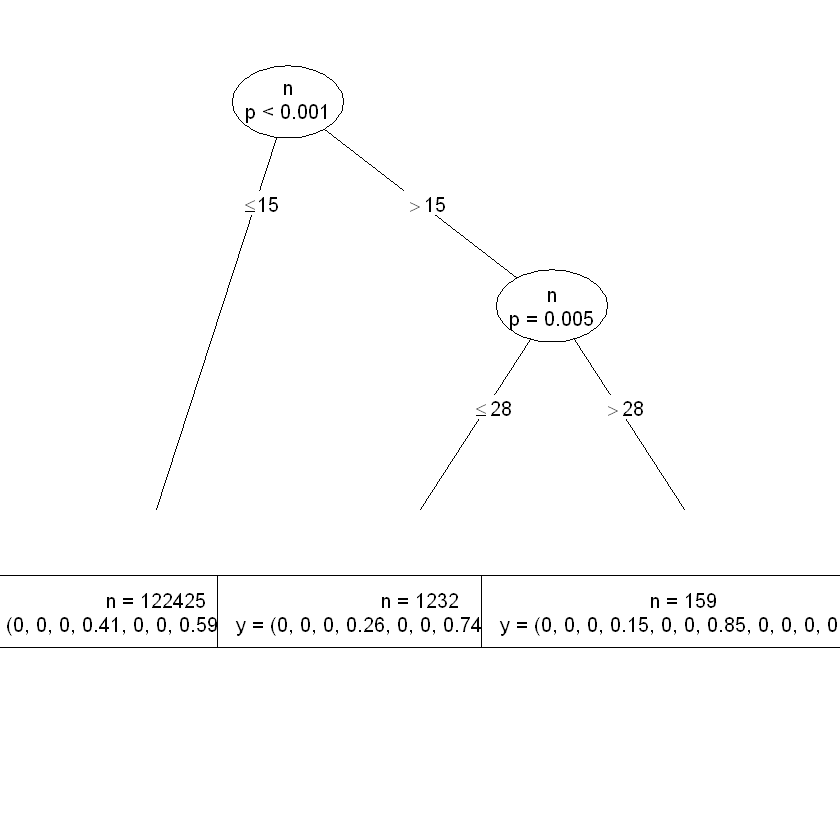

In [12]:
ResTypeoutput.tree <- ctree(  creditScore ~ ndyears ,   data = credit525)
#print(ResTypeoutput.tree)
plot(ResTypeoutput.tree, type="extended", inner_panel=node_inner(ResTypeoutput.tree,abbreviate = TRUE, pval = TRUE, id = FALSE), terminal_panel=node_terminal(ResTypeoutput.tree, abbreviate = TRUE, digits = 2, fill = c("white"),id = FALSE ))
#plot.new()
#mtext(text = "Ozone", side = 2, srt = 90, padj = -4, adj = 0)  

In [9]:
print(min(newdata$employedMonths))
print(max(newdata$employedMonths))

[1] 0
[1] 702


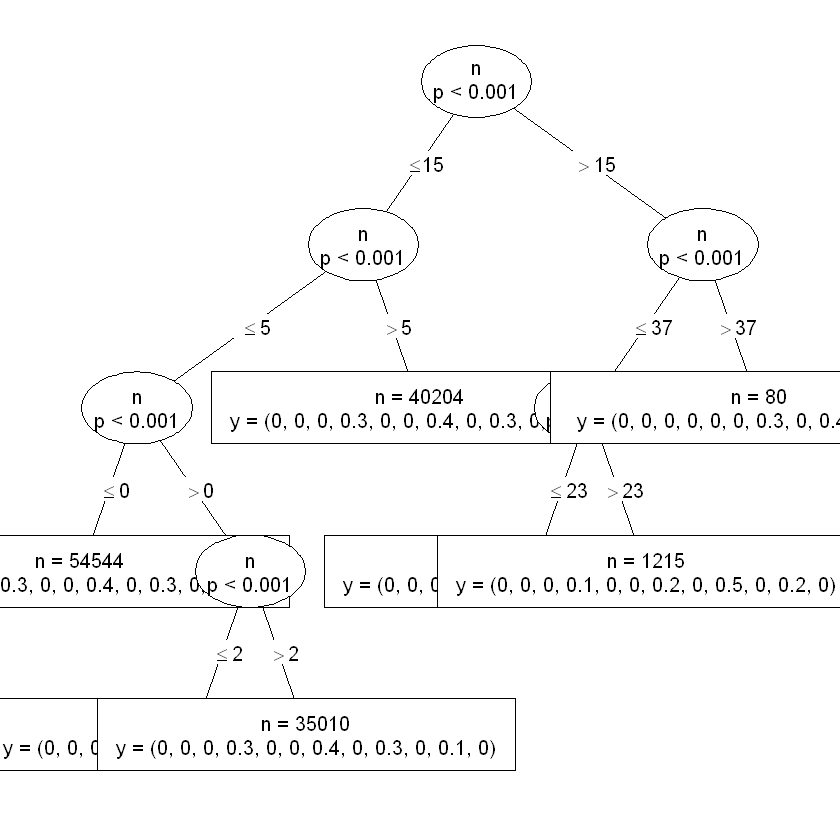

In [17]:
ResTypeoutput.tree <- ctree(  creditScore ~ ndyears ,   data = newdata2)
#print(ResTypeoutput.tree)
plot(ResTypeoutput.tree, type="simple", inner_panel=node_inner(ResTypeoutput.tree,abbreviate = TRUE, id = FALSE), terminal_panel=node_terminal(ResTypeoutput.tree, abbreviate = TRUE, digits = 1, fill = c("white"),id = FALSE ))
#plot.new()

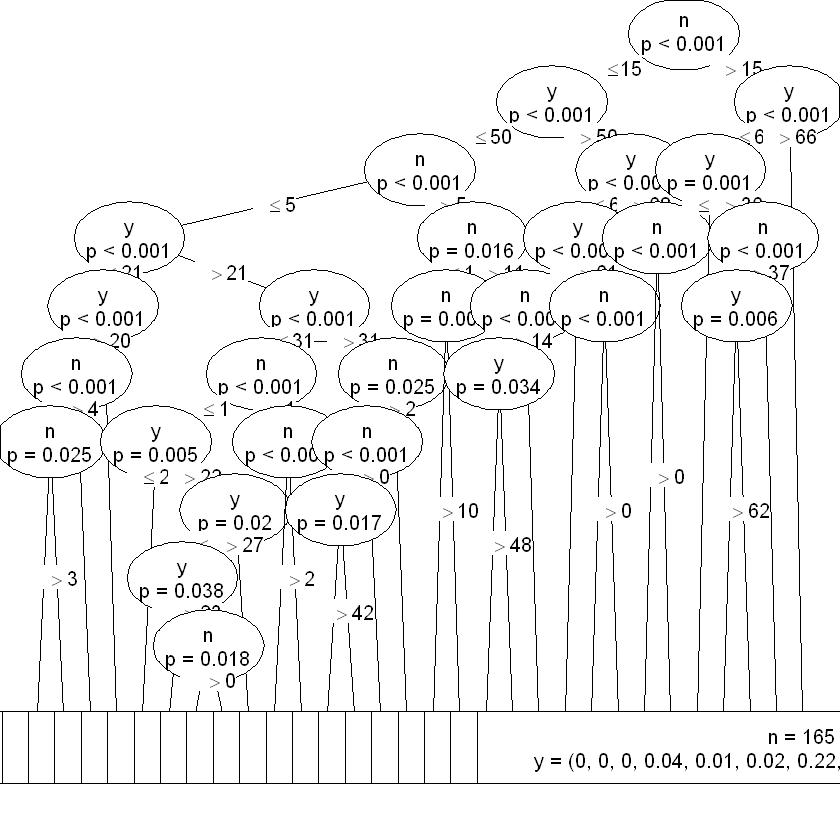

In [14]:
ResTypeoutput.tree <- ctree(  creditScore ~ ndyears+yourdata.age ,   data = newdata2)
#print(ResTypeoutput.tree)
plot(ResTypeoutput.tree, type="extended", inner_panel=node_inner(ResTypeoutput.tree,abbreviate = TRUE, pval = TRUE, id = FALSE), terminal_panel=node_terminal(ResTypeoutput.tree, abbreviate = TRUE, digits = 2, fill = c("white"),id = FALSE ))
#plot.new()

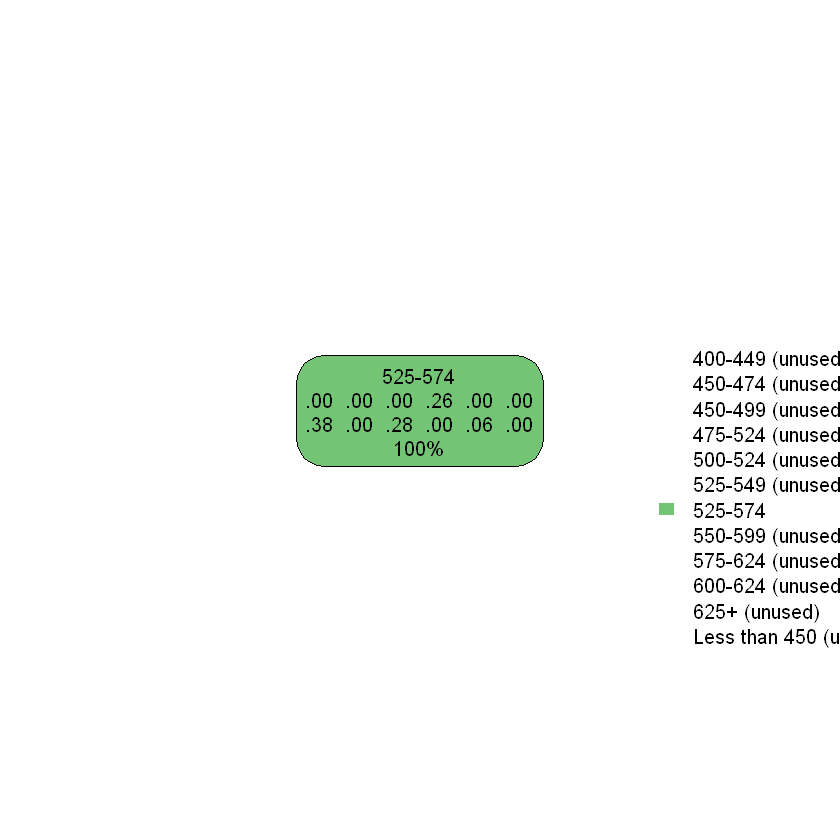

In [21]:
ResTypeoutput.treerpart <- rpart (  creditScore ~ ndyears+yourdata.age ,   data = newdata2)
rpart.plot(ResTypeoutput.treerpart)

Random Forests

In [23]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin



In [37]:
library(bigmemory)
randomF = randomForest(creditScore ~ residenceType ,ntree=500 , data = newdata2)

ERROR: Error: cannot allocate vector of size 1.4 Gb


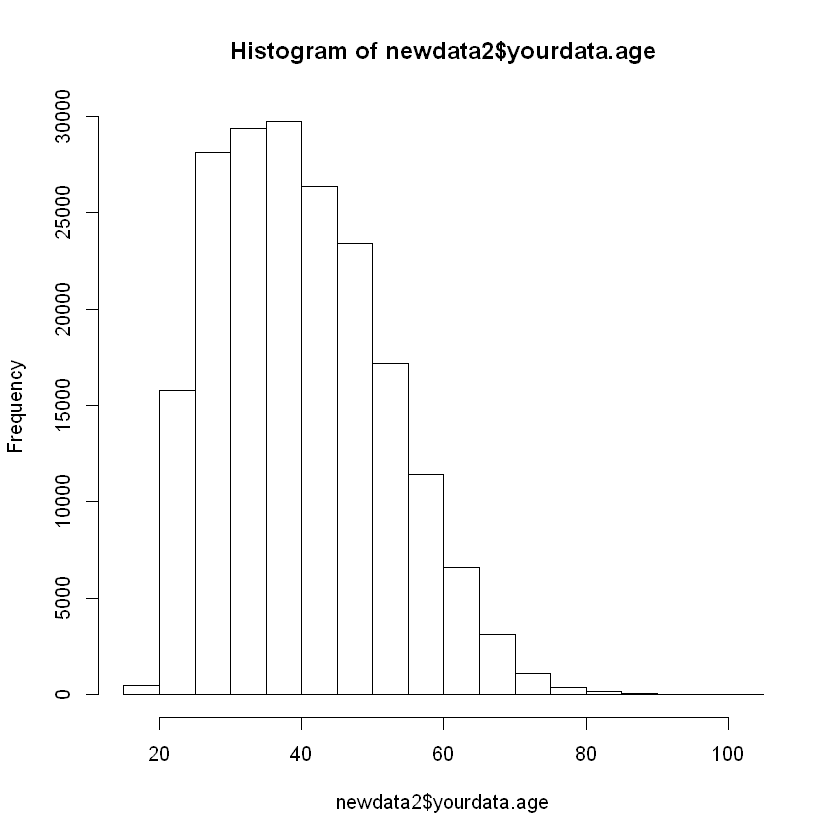

In [35]:
hist(newdata2$yourdata.age,breaks=20)

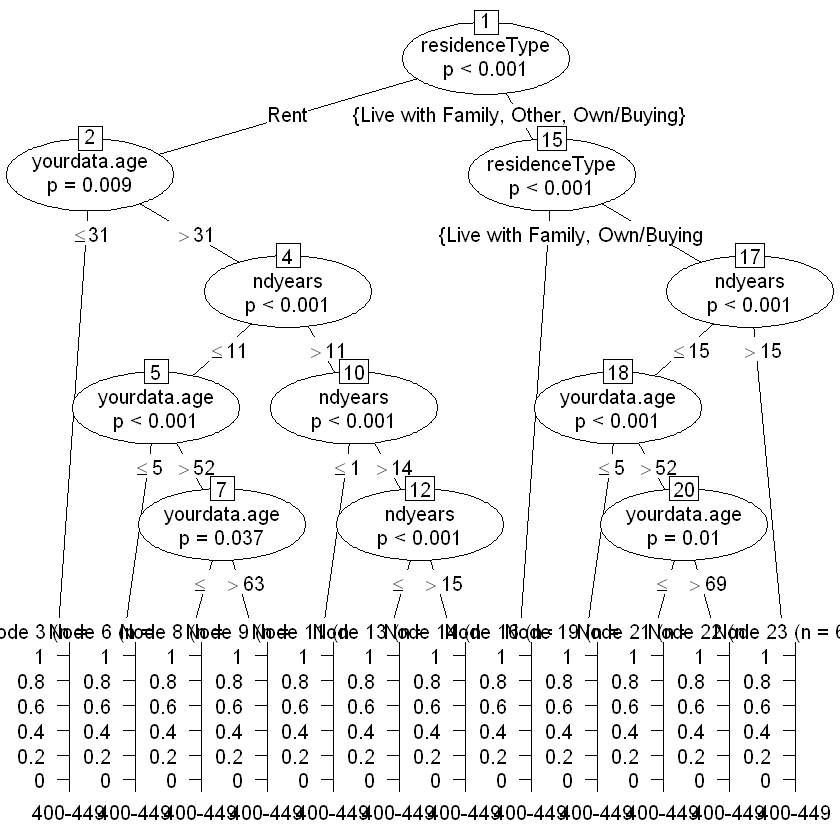

In [39]:
# Create the tree.
  output.tree <- ctree(
  creditScore ~ residenceType+ ndyears+yourdata.age, 
  data = credit525)

plot(output.tree)

In [41]:
print(sort(unique(newdata2$creditScore)))

 [1] 400-449       450-474       450-499       475-524       500-524      
 [6] 525-549       525-574       550-599       575-624       600-624      
[11] 625+          Less than 450
12 Levels: 400-449 450-474 450-499 475-524 500-524 525-549 525-574 ... Less than 450


In [54]:
library(dplyr)
newdata3 <- mutate(newdata2, cscore = ifelse(creditScore == "440-449" ,1 , 
                                  ifelse(creditScore == "450-474" ,2 ,
								  ifelse(creditScore == "450-499" ,3 ,
								  ifelse(creditScore == "475-524" ,4 ,
								  ifelse(creditScore == "500-524" ,5 ,
								  ifelse(creditScore == "525-549" ,6 ,
								  ifelse(creditScore == "525-574" ,7 ,
								  ifelse(creditScore == "550-599" ,8 ,
								  ifelse(creditScore == "575-624" ,9 ,
								  ifelse(creditScore == "600-624" ,10 ,
								  ifelse(creditScore == "625+" ,11 ,
								  ifelse(creditScore == "Less than 450" ,12,0 )
                                 
								))))))))))))


In [55]:
print(str(newdata3))

'data.frame':	193336 obs. of  19 variables:
 $ id             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ city           : Factor w/ 12451 levels "ABBEVILLE","ABBOT",..: 7638 1277 5154 3897 536 10698 8905 869 6337 536 ...
 $ state          : Factor w/ 53 levels "AB","AK","AL",..: 17 36 36 24 22 16 11 23 6 22 ...
 $ postalCode     : Factor w/ 21196 levels "10001","10002",..: 10165 80 359 10383 2706 13220 6257 8389 19204 2697 ...
 $ country        : Factor w/ 2 levels "CAN","USA": 2 2 2 2 2 2 2 2 2 2 ...
 $ dateOfBirth    : Factor w/ 19321 levels "1/1/1939","1/1/1941",..: 16594 13518 17701 10045 17632 12249 18262 12509 8366 5854 ...
 $ monthsAtAddress: int  26 4 117 6 114 85 2 12 114 27 ...
 $ residenceType  : Factor w/ 4 levels "Live with Family",..: 3 4 3 4 4 3 2 2 4 4 ...
 $ housingPayment : int  100 1200 600 1200 1300 650 300 1 150 900 ...
 $ employmentType : Factor w/ 3 levels "1099/Self Employed",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ employedMonths : int  129 29 178 69 42 208 226 5 6 131 ...
 $ oc

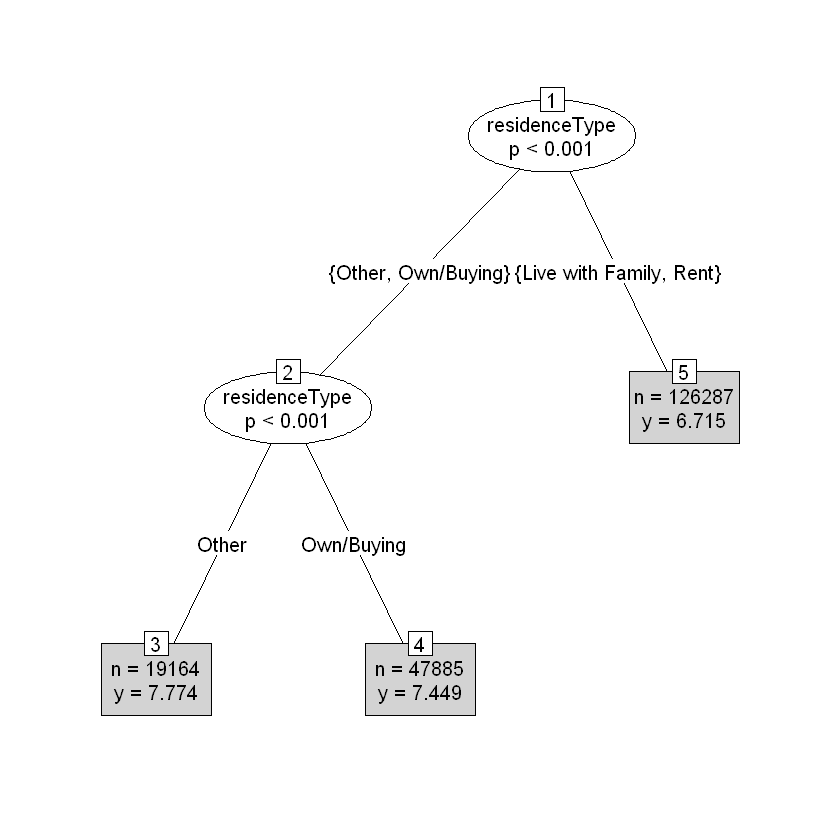

In [61]:
# Create the tree.
  output.tree <- ctree(
  cscore ~ residenceType, 
  data = newdata3)

plot(output.tree,type="simple")

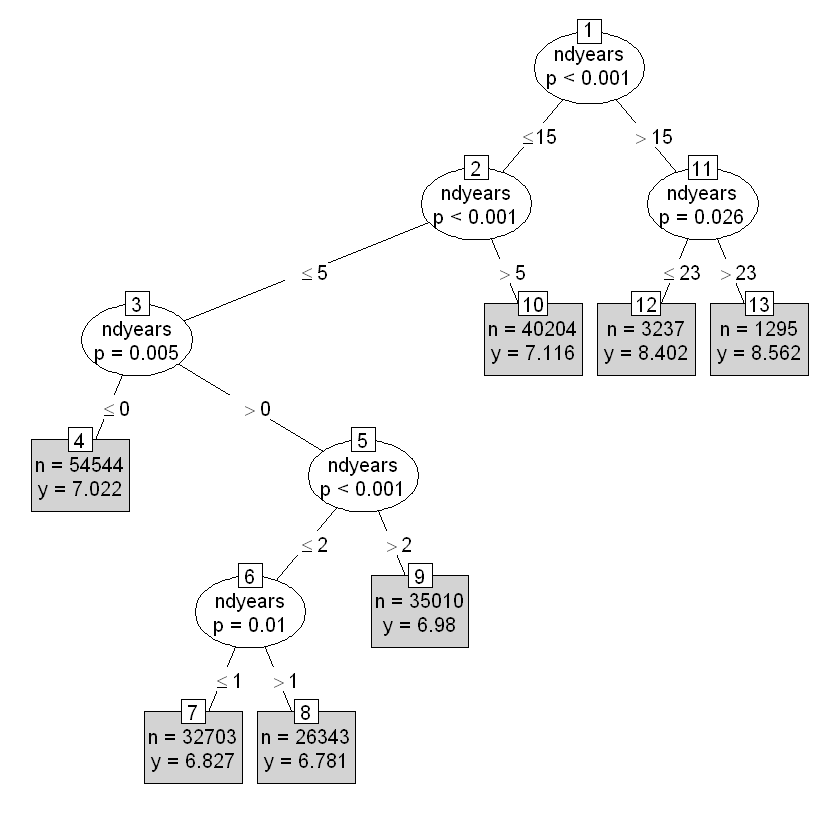

In [60]:
# Create the tree.
  output.tree <- ctree(
  cscore ~ ndyears, 
  data = newdata3)

plot(output.tree, type="simple")

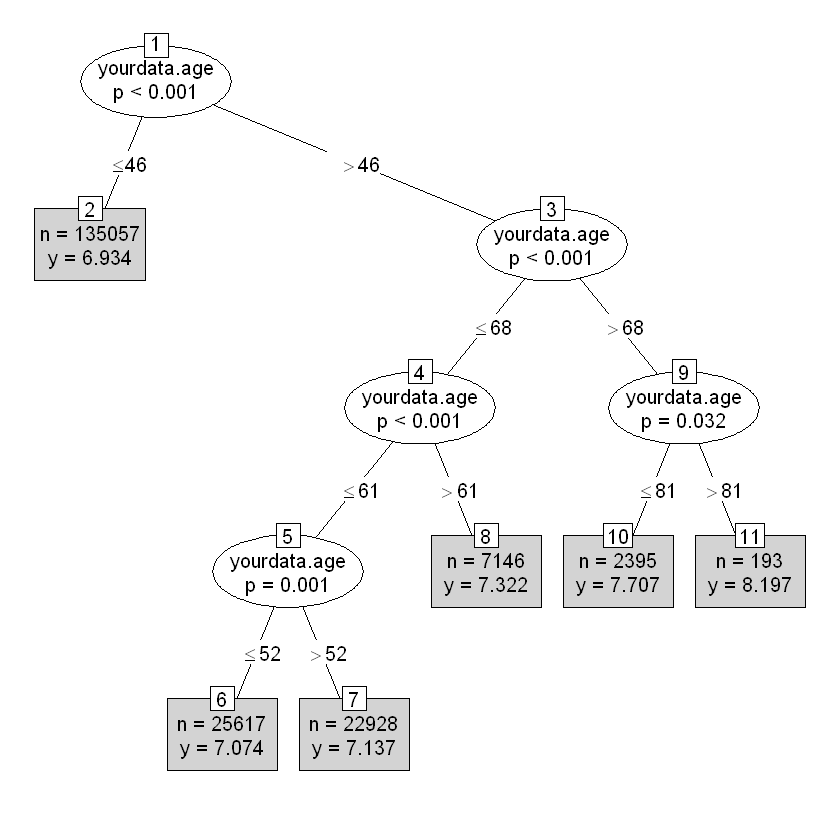

In [62]:
# Create the tree.
  output.tree <- ctree(
  cscore ~ yourdata.age, 
  data = newdata3)

plot(output.tree, type="simple")

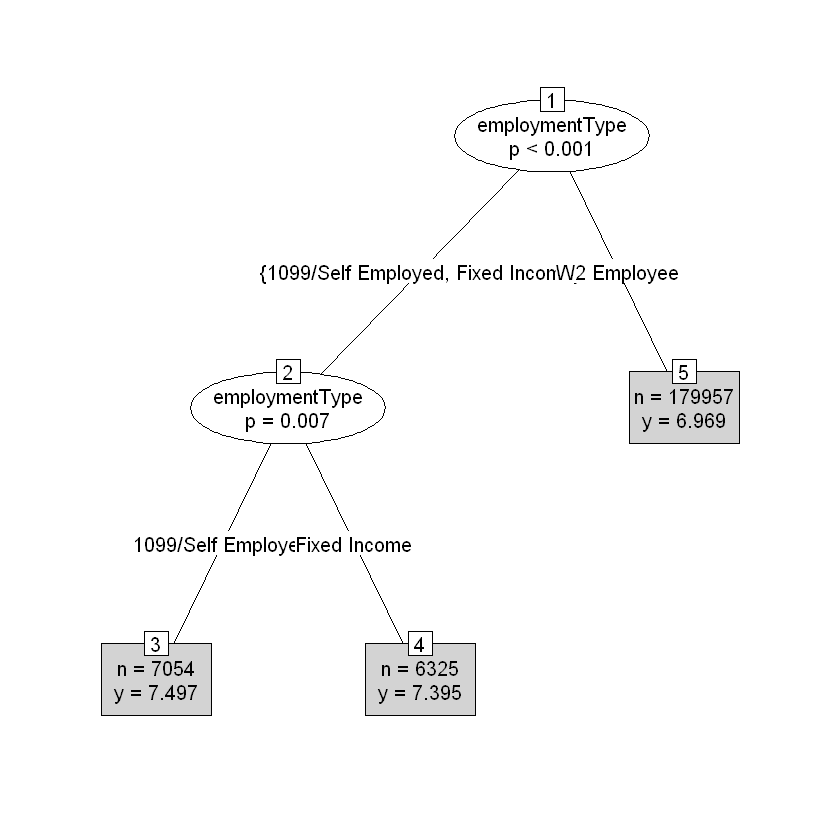

In [64]:
# Create the tree.
  output.tree <- ctree(
  cscore ~ employmentType, 
  data = newdata3)

plot(output.tree, type="simple")

In [65]:
newdata4 <- mutate(newdata2, cscore = ifelse(creditScore == "440-449" ,445 , 
                                  ifelse(creditScore == "450-474" ,462 ,
								  ifelse(creditScore == "450-499" ,475 ,
								  ifelse(creditScore == "475-524" ,500 ,
								  ifelse(creditScore == "500-524" ,512 ,
								  ifelse(creditScore == "525-549" ,537 ,
								  ifelse(creditScore == "525-574" ,550 ,
								  ifelse(creditScore == "550-599" ,575,
								  ifelse(creditScore == "575-624" ,600 ,
								  ifelse(creditScore == "600-624" ,612 ,
								  ifelse(creditScore == "625+" ,640 ,
								  ifelse(creditScore == "Less than 450" ,430,400 )
                                 
								))))))))))))

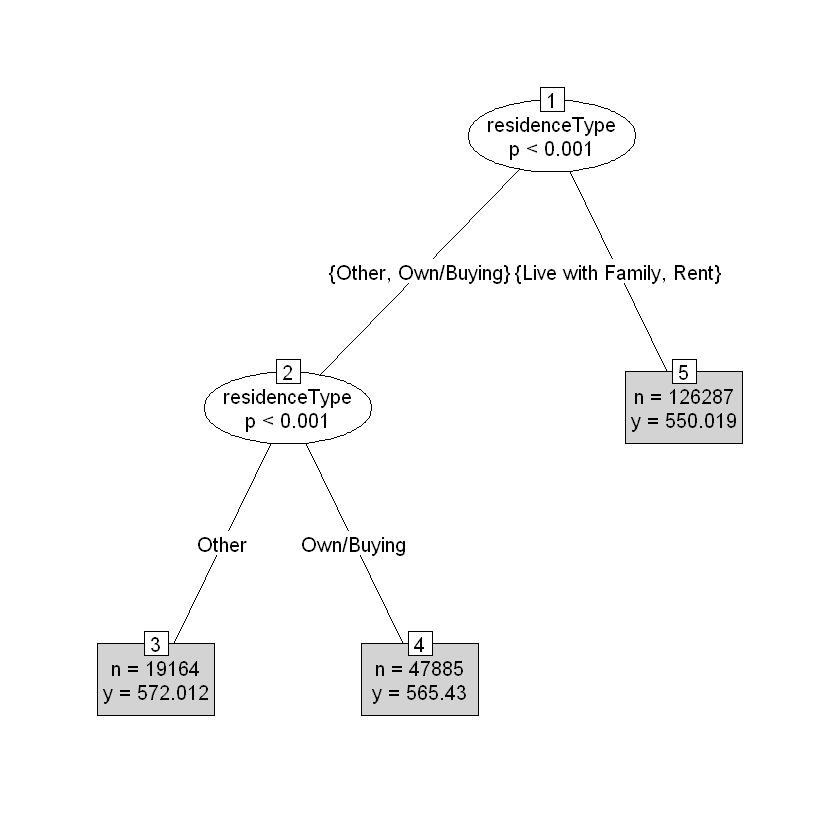

In [66]:
# Create the tree.
  output.tree <- ctree(
  cscore ~ residenceType, 
  data = newdata4)

plot(output.tree,type="simple")

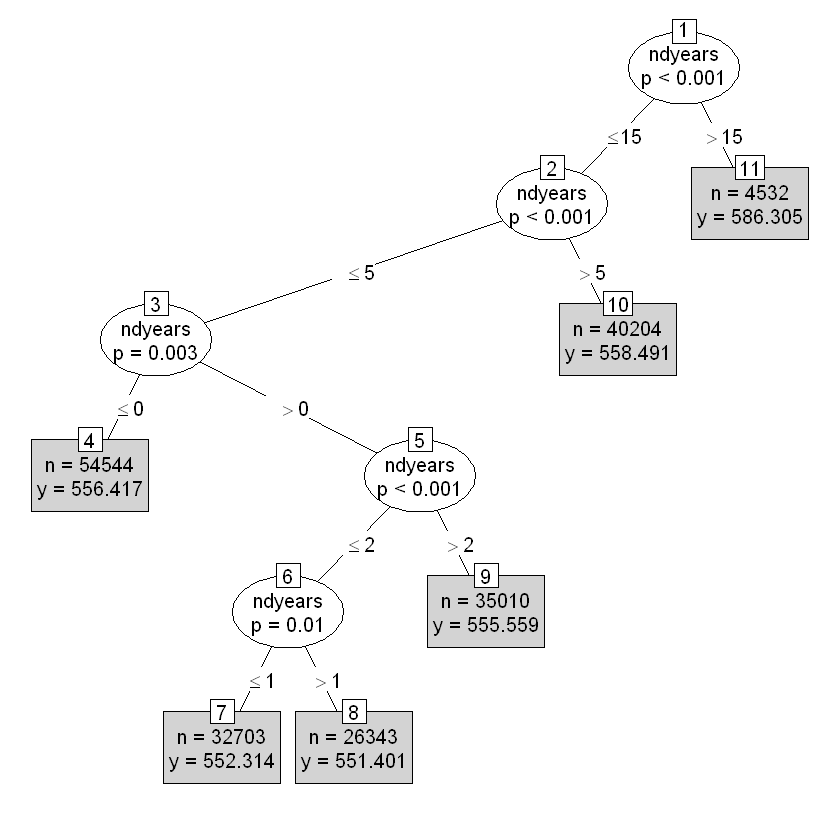

In [67]:
# Create the tree.
  output.tree <- ctree(
  cscore ~ ndyears, 
  data = newdata4)

plot(output.tree, type="simple")

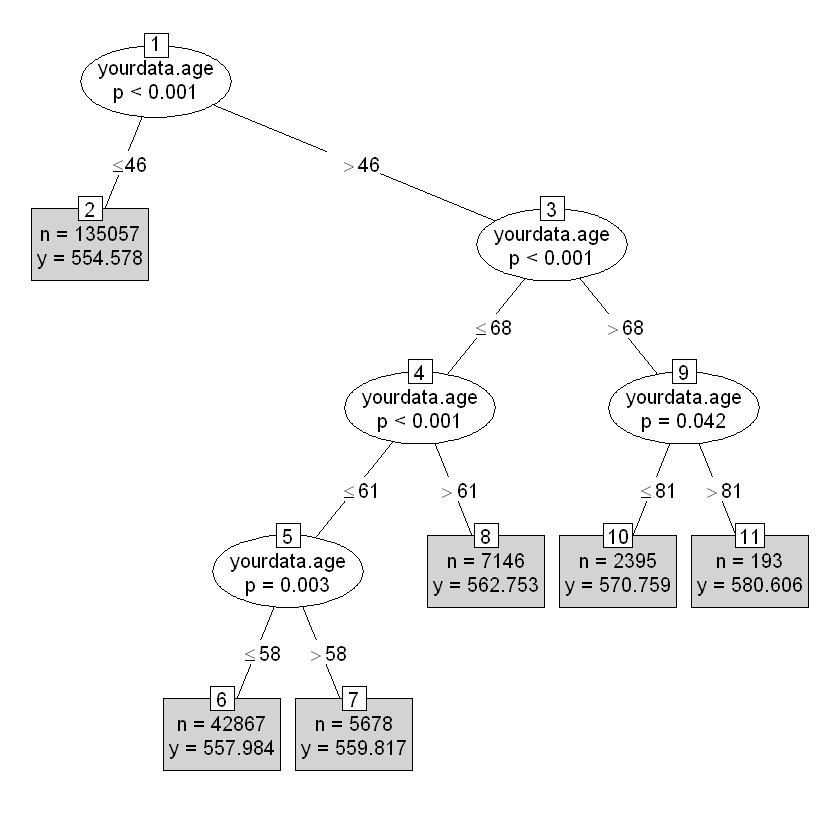

In [68]:
# Create the tree.
  output.tree <- ctree(
  cscore ~ yourdata.age, 
  data = newdata4)

plot(output.tree, type="simple")

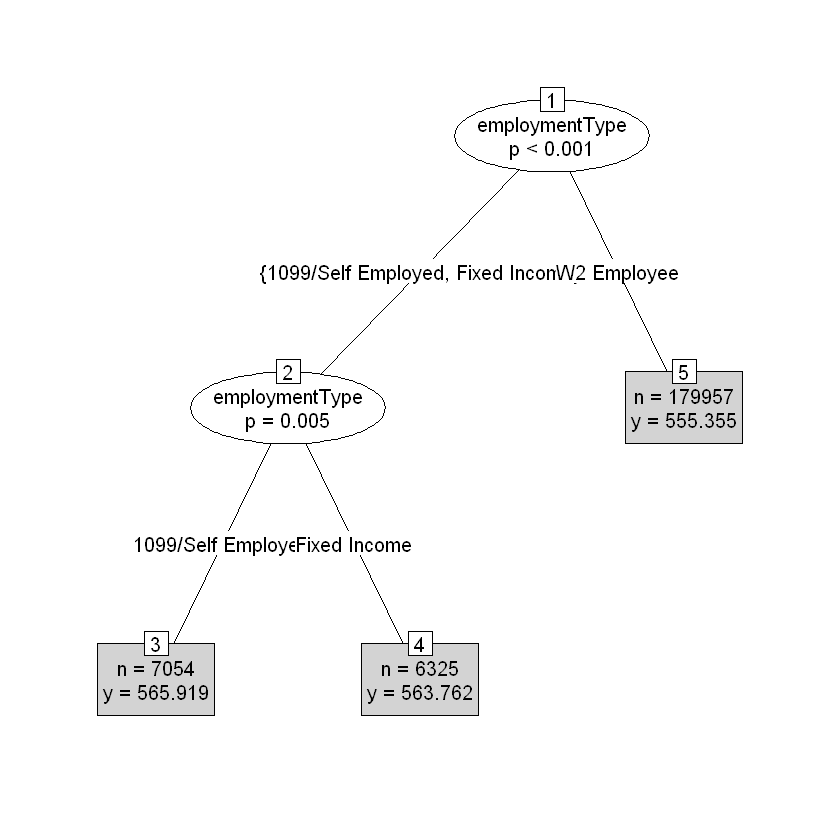

In [69]:
# Create the tree.
  output.tree <- ctree(
  cscore ~ employmentType, 
  data = newdata4)

plot(output.tree, type="simple")